$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [ ]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [ ]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [ ]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [ ]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [ ]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)
print('Minimum value:',fvals_ret[-1])

Optimizer: [-99.99958844  24.99994388]
Minimum value: 1.7253033717248775e-07


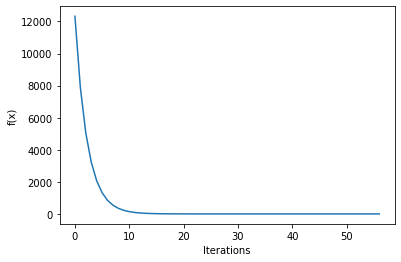

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

**Exercise 1.2**\
Minimizer- [-99.99958844  24.99994388]\
Minimum value- 1.7253033717248775e-07

tolerance level: 0.1
Optimizer: [-99.9553787   24.99391528]
minimum value 0.0020280843668995063
number of iterations: 36
tolerance level: 0.01
Optimizer: [-99.99520882  24.99934666]
minimum value 2.3382220797474075e-05
number of iterations: 46
tolerance level: 0.001
Optimizer: [-99.99958844  24.99994388]
minimum value 1.7253033717248775e-07
number of iterations: 57
tolerance level: 0.0001
Optimizer: [-99.99995581  24.99999397]
minimum value 1.989139359193299e-09
number of iterations: 67
tolerance level: 1e-05
Optimizer: [-99.99999526  24.99999935]
minimum value 2.293321544605827e-11
number of iterations: 77
tolerance level: 1e-06
Optimizer: [-99.99999959  24.99999994]
minimum value 1.6921726745458407e-13
number of iterations: 88
tolerance level: 1e-07
Optimizer: [-99.99999996  24.99999999]
minimum value 1.950942200128245e-15
number of iterations: 98
tolerance level: 1e-08
Optimizer: [-100.   25.]
minimum value 2.249273021138356e-17
number of iterations: 108
tolerance level: 1e-09
Optim

Text(0.5, 0, 'Tolerance')

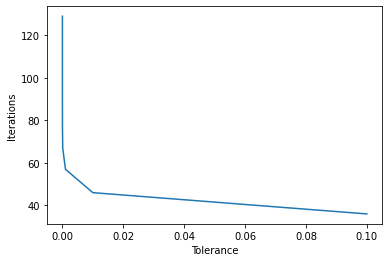

In [ ]:
my_start_x = np.array([10,10])
my_steplength = 0.1
itr=[]
tol=[]
for p in range(1,11):
  opt_x, fvals_ret = find_minimizer(my_start_x, 10**(-p), my_steplength)
  print('tolerance level:',10**-p)
  print('Optimizer:',opt_x)
  print('minimum value',fvals_ret[-1])
  print('number of iterations:',len(fvals_ret))
  itr.append(len(fvals_ret))
  tol.append(10**-p)
plt.plot(tol,itr)
plt.ylabel('Iterations')
plt.xlabel('Tolerance')

**Exercise 1.3**
As the tolerance decreases, the number of iterations to achieve optimal value increases.Also the value of the objective function decreases with decrease in tolerance value and gets closer to actual minimum value of the function, the minimizers also attain the optimal value with the decrease in tolerance level

In [ ]:
my_start_x = np.array([10,10])
my_steplength =[0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
my_tol=10**-5

itr=[]
for p in range(1,12):
  opt_x, fvals_ret = find_minimizer(my_start_x,my_tol, my_steplength[p-1])
  print('steplength:',my_steplength[p-1])
  print('Optimizer:',opt_x)
  print('minimum value',fvals_ret[-1])
  print('number of iterations:',len(fvals_ret))
  itr.append(len(fvals_ret))
plt.plot(my_steplength,itr)
plt.ylabel('Iterations')
plt.xlabel('Step Length')

steplength: 0.0001
Optimizer: [-99.99999505  24.99999932]
minimum value 2.49936770204995e-11
number of iterations: 84572
steplength: 0.001
Optimizer: [-99.99999505  24.99999933]
minimum value 2.494219709847674e-11
number of iterations: 8451
steplength: 0.01
Optimizer: [-99.99999512  24.99999933]
minimum value 2.4304673044883465e-11
number of iterations: 839
steplength: 0.1
Optimizer: [-99.99999526  24.99999935]
minimum value 2.293321544605827e-11
number of iterations: 77
steplength: 0.2
Optimizer: [-99.99999685  24.99999957]
minimum value 1.011747066175869e-11
number of iterations: 35
steplength: 0.4
Optimizer: [-99.99999775  24.99999969]
minimum value 5.169479687800271e-12
number of iterations: 12
steplength: 0.5
Optimizer: [-100.   25.]
minimum value 0.0
number of iterations: 2
steplength: 0.6
Optimizer: [-100.00000225   25.00000031]
minimum value 5.169479687800271e-12
number of iterations: 12
steplength: 0.7
Optimizer: [-100.00000302   25.00000041]
minimum value 9.312506683476372e-1

Text(0.5, 0, 'Step Length')

**Exercise 1.4**
As the step length increases the number of iterations required to be performed to obtain the optimal value decreases initially till steplength= 0.5 and then increases.
For different choices of step length, the objective function value initially decreases till steplength=0.5 and then increases. Similarly for the value of the minimizer,x2 initially increases till steplength=0.5 and then decreases and vice versa for x1.
The number of iterations, objective function value are minimum for steplength=0.5. The minimizers attain the optimal value for steplength=0.5


In [ ]:
my_start_x = [[10000, 10000],[500, 0],[0, 1000],[1, 1],[-500, -2]]
my_steplength =0.1
my_tol=10**-5

for p in range(0,5):
  my_start_x=np.array(my_start_x)
  opt_x, fvals_ret = find_minimizer(my_start_x[p],my_tol, my_steplength)
  print('x0:',my_start_x[p])
  print('Optimizer:',opt_x)
  print('minimum value',fvals_ret[-1])
  print('number of iterations:',len(fvals_ret))


x0: [10000 10000]
Optimizer: [-99.99999679  25.00000317]
minimum value 2.0414342669998657e-11
number of iterations: 99
x0: [500   0]
Optimizer: [-99.99999566  24.99999982]
minimum value 1.888746375147865e-11
number of iterations: 85
x0: [   0 1000]
Optimizer: [-99.99999954  25.00000452]
minimum value 2.060780080476227e-11
number of iterations: 87
x0: [1 1]
Optimizer: [-99.99999564  24.99999896]
minimum value 2.0052840841640608e-11
number of iterations: 77
x0: [-500   -2]
Optimizer: [-100.00000452   24.99999969]
minimum value 2.055190630073527e-11
number of iterations: 83


In [ ]:
!pip install tabulate
from tabulate import tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_lst = np.array([[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]])
my_steplength = 0.1
my_tol= 10**(-5)
table = []
col_name = ['Initial values',' Optimizer', 'Minimum value', 'Number of iterations']
table.append(col_name)
for i in range(0,5):
 lsti = []
 my_start_x = x_lst[i]
 opt_x, fvals_ret= find_minimizer(my_start_x, my_tol, my_steplength)
 lsti.append(my_start_x)
 lsti.append(opt_x)
 lsti.append(min(fvals_ret))
 lsti.append(len(fvals_ret))
 table.append(lsti)
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════════╤═══════════════════════════════╤═════════════════╤════════════════════════╕
│ Initial values   │  Optimizer                    │   Minimum value │   Number of iterations │
╞══════════════════╪═══════════════════════════════╪═════════════════╪════════════════════════╡
│ [10000 10000]    │ [-99.99999679  25.00000317]   │     2.04143e-11 │                     99 │
├──────────────────┼───────────────────────────────┼─────────────────┼────────────────────────┤
│ [500   0]        │ [-99.99999566  24.99999982]   │     1.88875e-11 │                     85 │
├──────────────────┼───────────────────────────────┼─────────────────┼────────────────────────┤
│ [   0 1000]      │ [-99.99999954  25.00000452]   │     2.06078e-11 │                     87 │
├──────────────────┼───────────────────────────────┼─────────────────┼────────────────────────┤
│ [1 1]            │ [-99.99999564  24.99999896]   │     2.00528e-11 │                     77 │
├──────────────────┼────────────────────

**Exercise 1.5**
We observe that the initial values does not have significant impact on the number of iterations as we can see that the number of iterations required in case of initial value [10000 10000] is 99 and that in case of [1 1] is 77. This also gives us an intuition that the function has steep slope on both sides of the graph since the minimum value is attached quite early.
